# 품질보증 시스템

## 문제
품질관리는 모든 제조업에서 매우 중요합니다. 이것은 대량의 강판을 생산하는 제조 산업에 특히 해당됩니다. 강판 결함이란 무엇일까요? 결함은 관찰된 변수 또는 프로세스와 관련된 계산된 매개변수의 허용 가능한 범위 밖에 있는 값입니다. 
예를 들어 두께가 10cm이고 오차 범위가 ±2cm인 강판을 사용하는 것이 허용됩니다. 따라서 두께가 8.0cm에서 12.0cm 사이인 경우 강판을 사용할 수 있습니다. 단, 두께가 7.5cm인 경우에는 허용되지 않습니다.

오류는 장비 고장, 센서성능 저하 또는 프로세스 장애로 인한 비정상적인 프로세스 동작으로도 정의됩니다. 예를 들어 강판의 흠집은 결함입니다.

당신은 강판 제조 회사에서 일하고 있습니다.
당신의 팀은 지속적으로 품질이 저하되고 있으며, 강철판 결함이 많습니다. 철판 결함을 하나하나 확인하는 데 많은 비용과 인력, 시간이 소요됩니다.
상사가 결함을 자동으로 찾을 수 있는 방법을 알아봐 주길 원합니다. 회사에 도움이 될 생산 품질 데이터가 있습니다.

## 데이터
본 강의에서는 [Dataset]_Module11_(Quality).csv 파일을 사용하여 실험을 진행하겠습니다.

## 0. 머신러닝 패키지 준비

In [1]:
pip install xgboost --quiet

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

## 1. 데이터집합 로드
Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.Pandas의 read_csv() 함수를 사용하여 CSV(Comma-Separated Values) 형식의 파일을 손쉽게 로드할 수 있습니다.

In [3]:
data = pd.read_csv('[Dataset]_Module11_(Quality).csv')
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault_Types
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [4]:
data.shape

(1941, 28)

In [5]:
data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Fault_Types'],
      dtype='object')

## 2. 데이터 탐색

In [6]:
# 데이터집합의 통계적 특성 조회
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [7]:
# 목표 열인 Fault_Types의 고유값 확인
data['Fault_Types'].unique()

array(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], dtype=object)

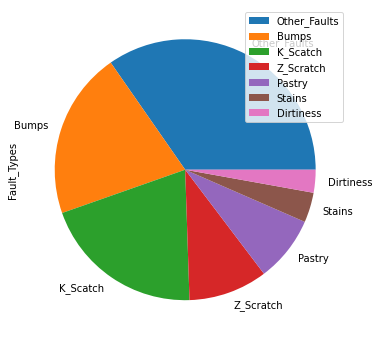

In [8]:
# Fault_Types 열의 분포 확인
plt.figure(figsize=(6, 6))
data['Fault_Types'].value_counts().plot.pie(legend=True)

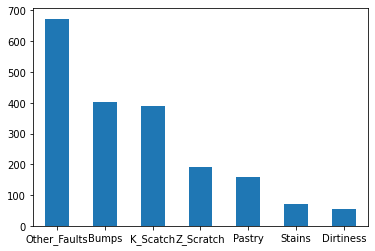

In [9]:
# Fault_Types 열의 분포 확인
data['Fault_Types'].value_counts().plot.bar(rot=0)

## 3. 데이터 준비와 분할

In [10]:
# feature와 label로 구분
X = data.drop(['Fault_Types'], axis=1)
y = data.Fault_Types

In [11]:
# 데이터를 학습용과 시험용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X), y, test_size=0.2, random_state=1)

## 4. 분류기 모델 생성

### 4.1 로지스틱 회귀 (Logistic Regression)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [13]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.66      0.56      0.60        79
   Dirtiness       0.71      0.50      0.59        10
    K_Scatch       0.90      0.91      0.91        80
Other_Faults       0.66      0.71      0.68       138
      Pastry       0.59      0.55      0.57        29
      Stains       0.87      1.00      0.93        13
   Z_Scratch       0.81      0.88      0.84        40

    accuracy                           0.73       389
   macro avg       0.74      0.73      0.73       389
weighted avg       0.73      0.73      0.73       389



### 4.2 k-최근접 이웃 (k-Nearest Neightbors, KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.55      0.72      0.62        79
   Dirtiness       0.75      0.90      0.82        10
    K_Scatch       0.95      0.91      0.93        80
Other_Faults       0.75      0.62      0.68       138
      Pastry       0.56      0.34      0.43        29
      Stains       0.87      1.00      0.93        13
   Z_Scratch       0.72      0.90      0.80        40

    accuracy                           0.73       389
   macro avg       0.73      0.77      0.74       389
weighted avg       0.74      0.73      0.72       389



In [16]:
knn.predict(X_test[:10])

array(['Other_Faults', 'K_Scatch', 'Bumps', 'Bumps', 'Bumps', 'Bumps',
       'Bumps', 'Z_Scratch', 'Bumps', 'Z_Scratch'], dtype=object)

### 4.3 결정 트리 (Decision Tree)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.55      0.61      0.57        79
   Dirtiness       0.67      0.80      0.73        10
    K_Scatch       0.91      0.90      0.91        80
Other_Faults       0.66      0.63      0.64       138
      Pastry       0.42      0.34      0.38        29
      Stains       0.93      1.00      0.96        13
   Z_Scratch       0.93      0.93      0.93        40

    accuracy                           0.71       389
   macro avg       0.72      0.74      0.73       389
weighted avg       0.71      0.71      0.71       389



### 4.4 랜덤 포레스트 (Random Forest)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.69      0.65      0.67        79
   Dirtiness       0.90      0.90      0.90        10
    K_Scatch       0.99      0.93      0.95        80
Other_Faults       0.70      0.80      0.74       138
      Pastry       0.76      0.55      0.64        29
      Stains       1.00      1.00      1.00        13
   Z_Scratch       0.92      0.88      0.90        40

    accuracy                           0.79       389
   macro avg       0.85      0.81      0.83       389
weighted avg       0.80      0.79      0.79       389



### 4.5 XGBoost (eXtreme Gradient Boosting)

In [21]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [22]:
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.65      0.68      0.67        79
   Dirtiness       1.00      0.80      0.89        10
    K_Scatch       0.96      0.90      0.93        80
Other_Faults       0.72      0.74      0.73       138
      Pastry       0.68      0.66      0.67        29
      Stains       1.00      1.00      1.00        13
   Z_Scratch       0.93      0.95      0.94        40

    accuracy                           0.79       389
   macro avg       0.85      0.82      0.83       389
weighted avg       0.79      0.79      0.79       389



### 4.6 다층 퍼셉트론 (Multi-Layer Perceptron)

In [23]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [24]:
y_pred = mlpc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.64      0.62      0.63        79
   Dirtiness       0.70      0.70      0.70        10
    K_Scatch       0.94      0.93      0.93        80
Other_Faults       0.68      0.72      0.70       138
      Pastry       0.68      0.52      0.59        29
      Stains       0.93      1.00      0.96        13
   Z_Scratch       0.85      0.88      0.86        40

    accuracy                           0.75       389
   macro avg       0.77      0.76      0.77       389
weighted avg       0.75      0.75      0.75       389



## 5. 더 좋은 모델 찾기
### 결정 트리 사례

In [25]:
# 현재 사용중인 매개변수 확인
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [26]:
# 교차 검증 기능으로 wrap하여 훈련시킴
dtr = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_distributions=dict(criterion=['gini', 'entropy'],
                             max_depth=[2,4,6,8,10,12]), 
    n_iter=10, cv=3, 
    verbose=2, random_state=42, n_jobs=-1)
dtr.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12]},
                   random_state=42, verbose=2)

In [27]:
y_pred = dtr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Bumps       0.53      0.61      0.56        79
   Dirtiness       0.82      0.90      0.86        10
    K_Scatch       0.96      0.90      0.93        80
Other_Faults       0.64      0.62      0.63       138
      Pastry       0.46      0.41      0.44        29
      Stains       0.93      1.00      0.96        13
   Z_Scratch       0.95      0.90      0.92        40

    accuracy                           0.71       389
   macro avg       0.75      0.76      0.76       389
weighted avg       0.72      0.71      0.71       389



이 결과가 4.3에서 생성한 결정 트리 모델 dtc에 비해 더 나은 결과를 산출했나요? 제3주차 강의에서 학습한 FLAML을 사용한 경우과 비교할 경우는 어떠한가요?

## 6. predict vs. predict_proba

In [28]:
# 몇 개의 데이터에 대한 항목 예측
lr.predict(X_test[:5])

array(['Other_Faults', 'K_Scatch', 'Bumps', 'Other_Faults',
       'Other_Faults'], dtype=object)

In [29]:
# 몇 개의 데이터에 대한 확률 예측
# 매 데이터마다 분류항목의 개수만큼의 확률들의 배열 산출
lr.predict_proba(X_test[:5])

array([[4.41549037e-01, 4.40686058e-04, 1.18985515e-03, 5.44200907e-01,
        1.20698410e-02, 2.73875892e-04, 2.75798060e-04],
       [1.01029961e-03, 2.54082676e-07, 9.88021855e-01, 1.08850552e-02,
        2.27169169e-08, 1.10560615e-09, 8.25120612e-05],
       [4.65390517e-01, 1.16612924e-03, 4.31464982e-02, 3.72684724e-01,
        1.17560913e-01, 4.97878283e-05, 1.43153832e-06],
       [2.81744028e-01, 3.99757439e-04, 1.33557542e-05, 7.07337897e-01,
        5.49117583e-03, 3.98462877e-03, 1.02915747e-03],
       [4.01934304e-01, 2.11599223e-03, 8.84216073e-04, 5.91863593e-01,
        1.38367958e-03, 5.14770273e-04, 1.30344441e-03]])

In [30]:
# 매 데이터마다 확률 예측 값이 가장 큰 위치 판별
maxpos = [np.argmax(proba) for proba in lr.predict_proba(X_test[:5])]
maxpos

[3, 2, 0, 3, 3]

In [31]:
# 모델의 분류 항목 (순서 중요!)
lr.classes_

array(['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry',
       'Stains', 'Z_Scratch'], dtype=object)

In [32]:
lr.classes_[maxpos]

array(['Other_Faults', 'K_Scatch', 'Bumps', 'Other_Faults',
       'Other_Faults'], dtype=object)

In [33]:
# 이상을 종합하여 함수로 작성
# 임의의 Scikit-Learn 호환 분류 모델에 적용 가능
def predict_via_proba(model, data):
    return model.classes_[[np.argmax(proba) for proba in model.predict_proba(data)]]

In [34]:
# predict_via_proba 실험: 로지스틱 회귀 모델 lr의 경우
predict_via_proba(lr, X_test[:5]), lr.predict(X_test[:5])

(array(['Other_Faults', 'K_Scatch', 'Bumps', 'Other_Faults',
        'Other_Faults'], dtype=object),
 array(['Other_Faults', 'K_Scatch', 'Bumps', 'Other_Faults',
        'Other_Faults'], dtype=object))

In [35]:
# predict_via_proba 실험: 랜덤 포레스트 모델 rfc의 경우
predict_via_proba(rfc, X_test[:5]), rfc.predict(X_test[:5])

(array(['Other_Faults', 'K_Scatch', 'Bumps', 'Bumps', 'Other_Faults'],
       dtype=object),
 array(['Other_Faults', 'K_Scatch', 'Bumps', 'Bumps', 'Other_Faults'],
       dtype=object))

## 6. 모델 설명

### 로지스틱 회귀 사례

                  feature      coef
0               X_Minimum  0.003335
1               X_Maximum  0.108350
2               Y_Minimum  0.123946
3               Y_Maximum  0.123590
4            Pixels_Areas -0.896472
5             X_Perimeter  0.126316
6             Y_Perimeter -0.402415
7       Sum_of_Luminosity  0.146655
8   Minimum_of_Luminosity  0.013450
9   Maximum_of_Luminosity  0.314348
10     Length_of_Conveyer  0.458450
11       TypeOfSteel_A300  0.180667
12       TypeOfSteel_A400 -0.180667
13  Steel_Plate_Thickness  0.313825
14            Edges_Index  0.216127
15            Empty_Index  0.013115
16           Square_Index  0.536566
17        Outside_X_Index  0.570444
18          Edges_X_Index  0.206030
19          Edges_Y_Index -0.297342
20   Outside_Global_Index  0.044626
21             LogOfAreas  0.274590
22            Log_X_Index  0.267530
23            Log_Y_Index  0.042429
24      Orientation_Index  0.290815
25       Luminosity_Index -0.565595
26         SigmoidOfAreas  0

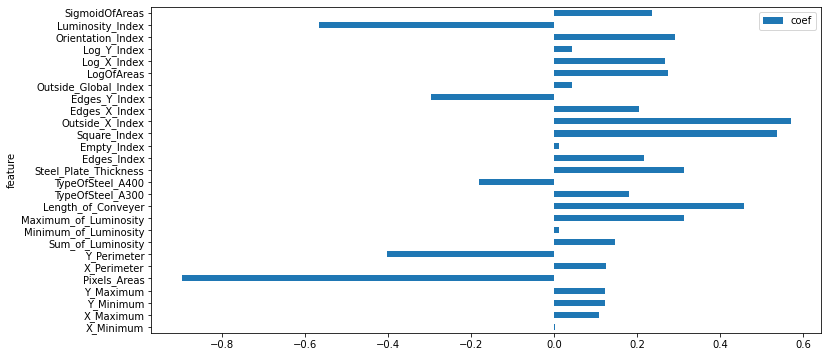

In [36]:
lr_exp = pd.DataFrame({'feature': X.columns.tolist(), 'coef': lr.coef_[0]})
print(lr_exp)
lr_exp.plot(kind='barh', x='feature', y='coef', figsize=(12, 6))

### 결정 트리 사례

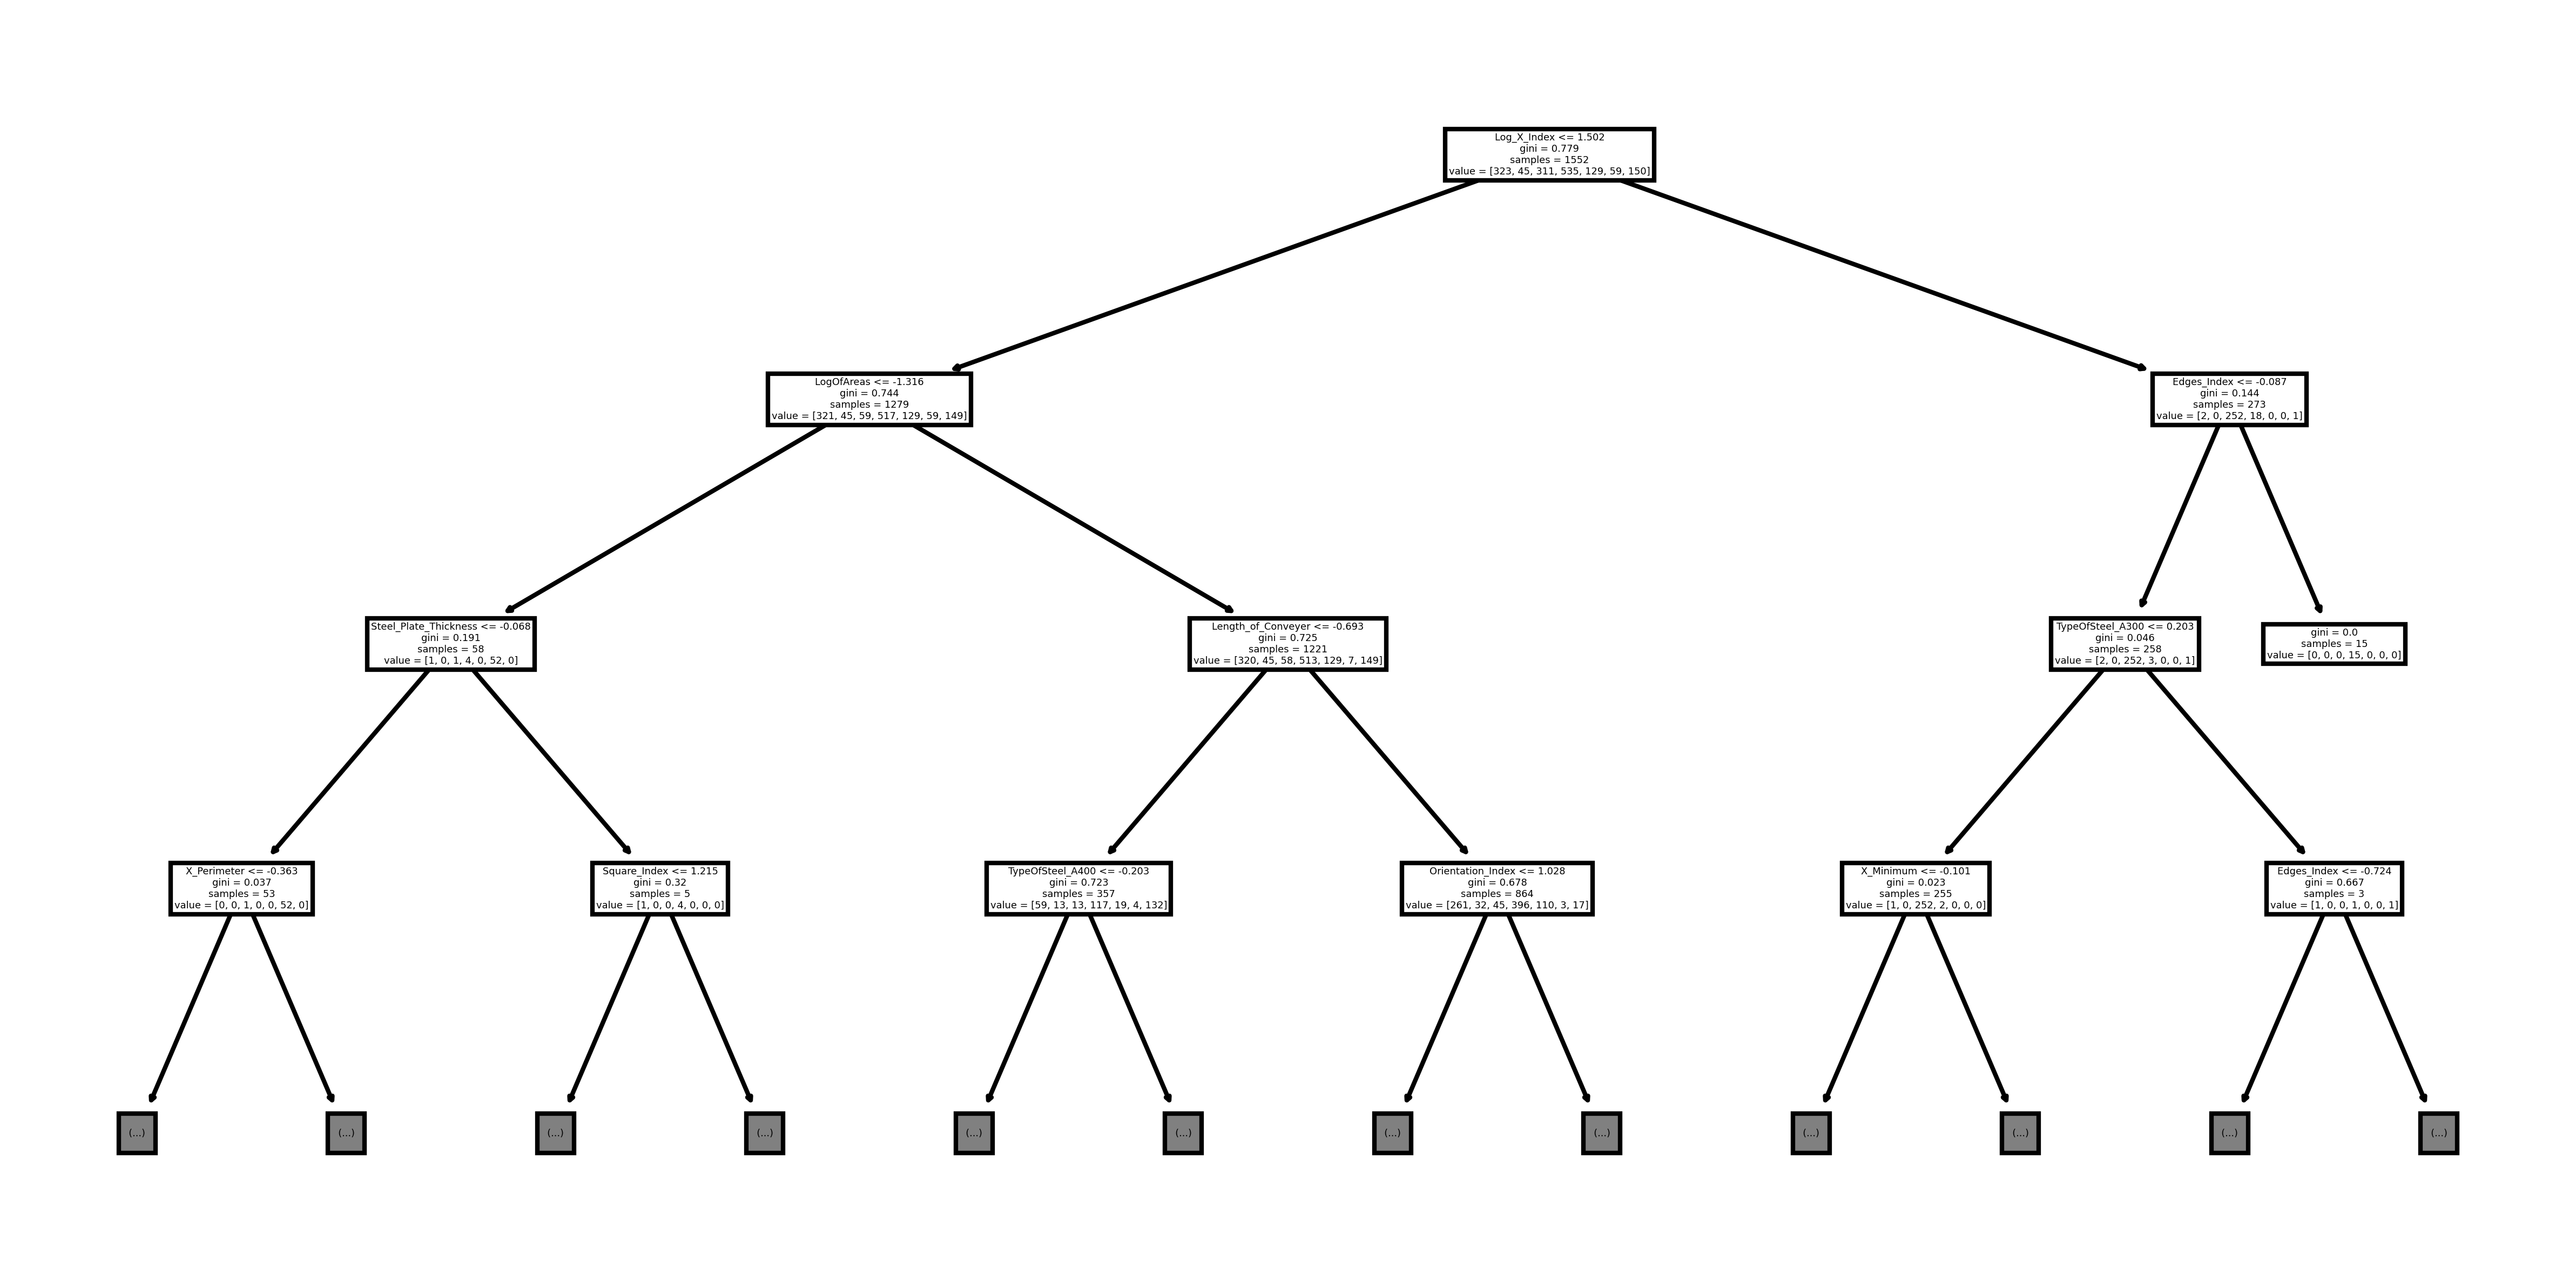

In [37]:
from sklearn import tree
plt.figure(figsize=(10, 5), dpi=600)
_ = tree.plot_tree(dtc, feature_names=X.columns.tolist(), max_depth=3, filled=None)

## 결론

본 실험에서는 강판의 결함을 판별하는 사례를 통해 또 다른 분류 문제를 머신러닝을 사용하여 해결해 보았습니다. 앞에서 학습했던 보험사기 탐지와는 다른 문제임에도 불구하고 머신러닝 코드는 구조적으로 앞에서와 완전히 동일합니다. 이러한 일관성은 두 문제 모두 "분류" 문제라는 특성에서 기인한 것입니다. 이처럼 Scikit-Learn은 머신러닝 관점에서 동일한 부류의 문제에 대하여 데이터집합이나 사용하는 알고리듬이 변경되더라도 코드의 구조를 유지할 수 있는 장점을 제공합니다.

또한 XGBoost나 LightGBM은 Scikit-Learn의 멤버가 아니지만 의도적으로 Scikit-Learn과 동일한 인터페이스를 제공하여 Scikit-Learn 모델이 사용될 수 있는 임의의 프로그램에서 사용될 수 있도록 하였습니다.